In [156]:
import json
import pandas as pd
import importlib
import matplotlib.pyplot as plt
import utils.minimum_union as mu
importlib.reload(mu)

<module 'utils.minimum_union' from '/mnt/c/Users/jandh/Git/wu-bachelor-thesis/log-statistics/notebooks/utils/minimum_union.py'>

# DBpedia

In [142]:
parts = [2013, 2014, 2015, 2016]
usewod_dfs = [mu.import_statistics(f"../../new-queryshapes-results/usewod_{part}", to_set=True) for part in parts]
max_cov = [df["weight"].sum() / meta["VALID_QUERIES"] for df, meta in usewod_dfs]
print(max_cov)

[0.6275395599471748, 0.9274821446890399, 0.8761425536809428, 0.7054165741974265]


In [143]:
usewod_dfs_minimum_unions = [mu.calc_minimum_unions(df, meta["VALID_QUERIES"]) for df, meta in usewod_dfs]

62.75395599471748
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64]
92.748214468904
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94]
87.61425536809429
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88]
70.54165741974265
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72]


In [144]:
import pickle
with open("../../usewod_dfs_minimum_unions_new.pickle", "wb") as file:
    pickle.dump(usewod_dfs_minimum_unions, file)

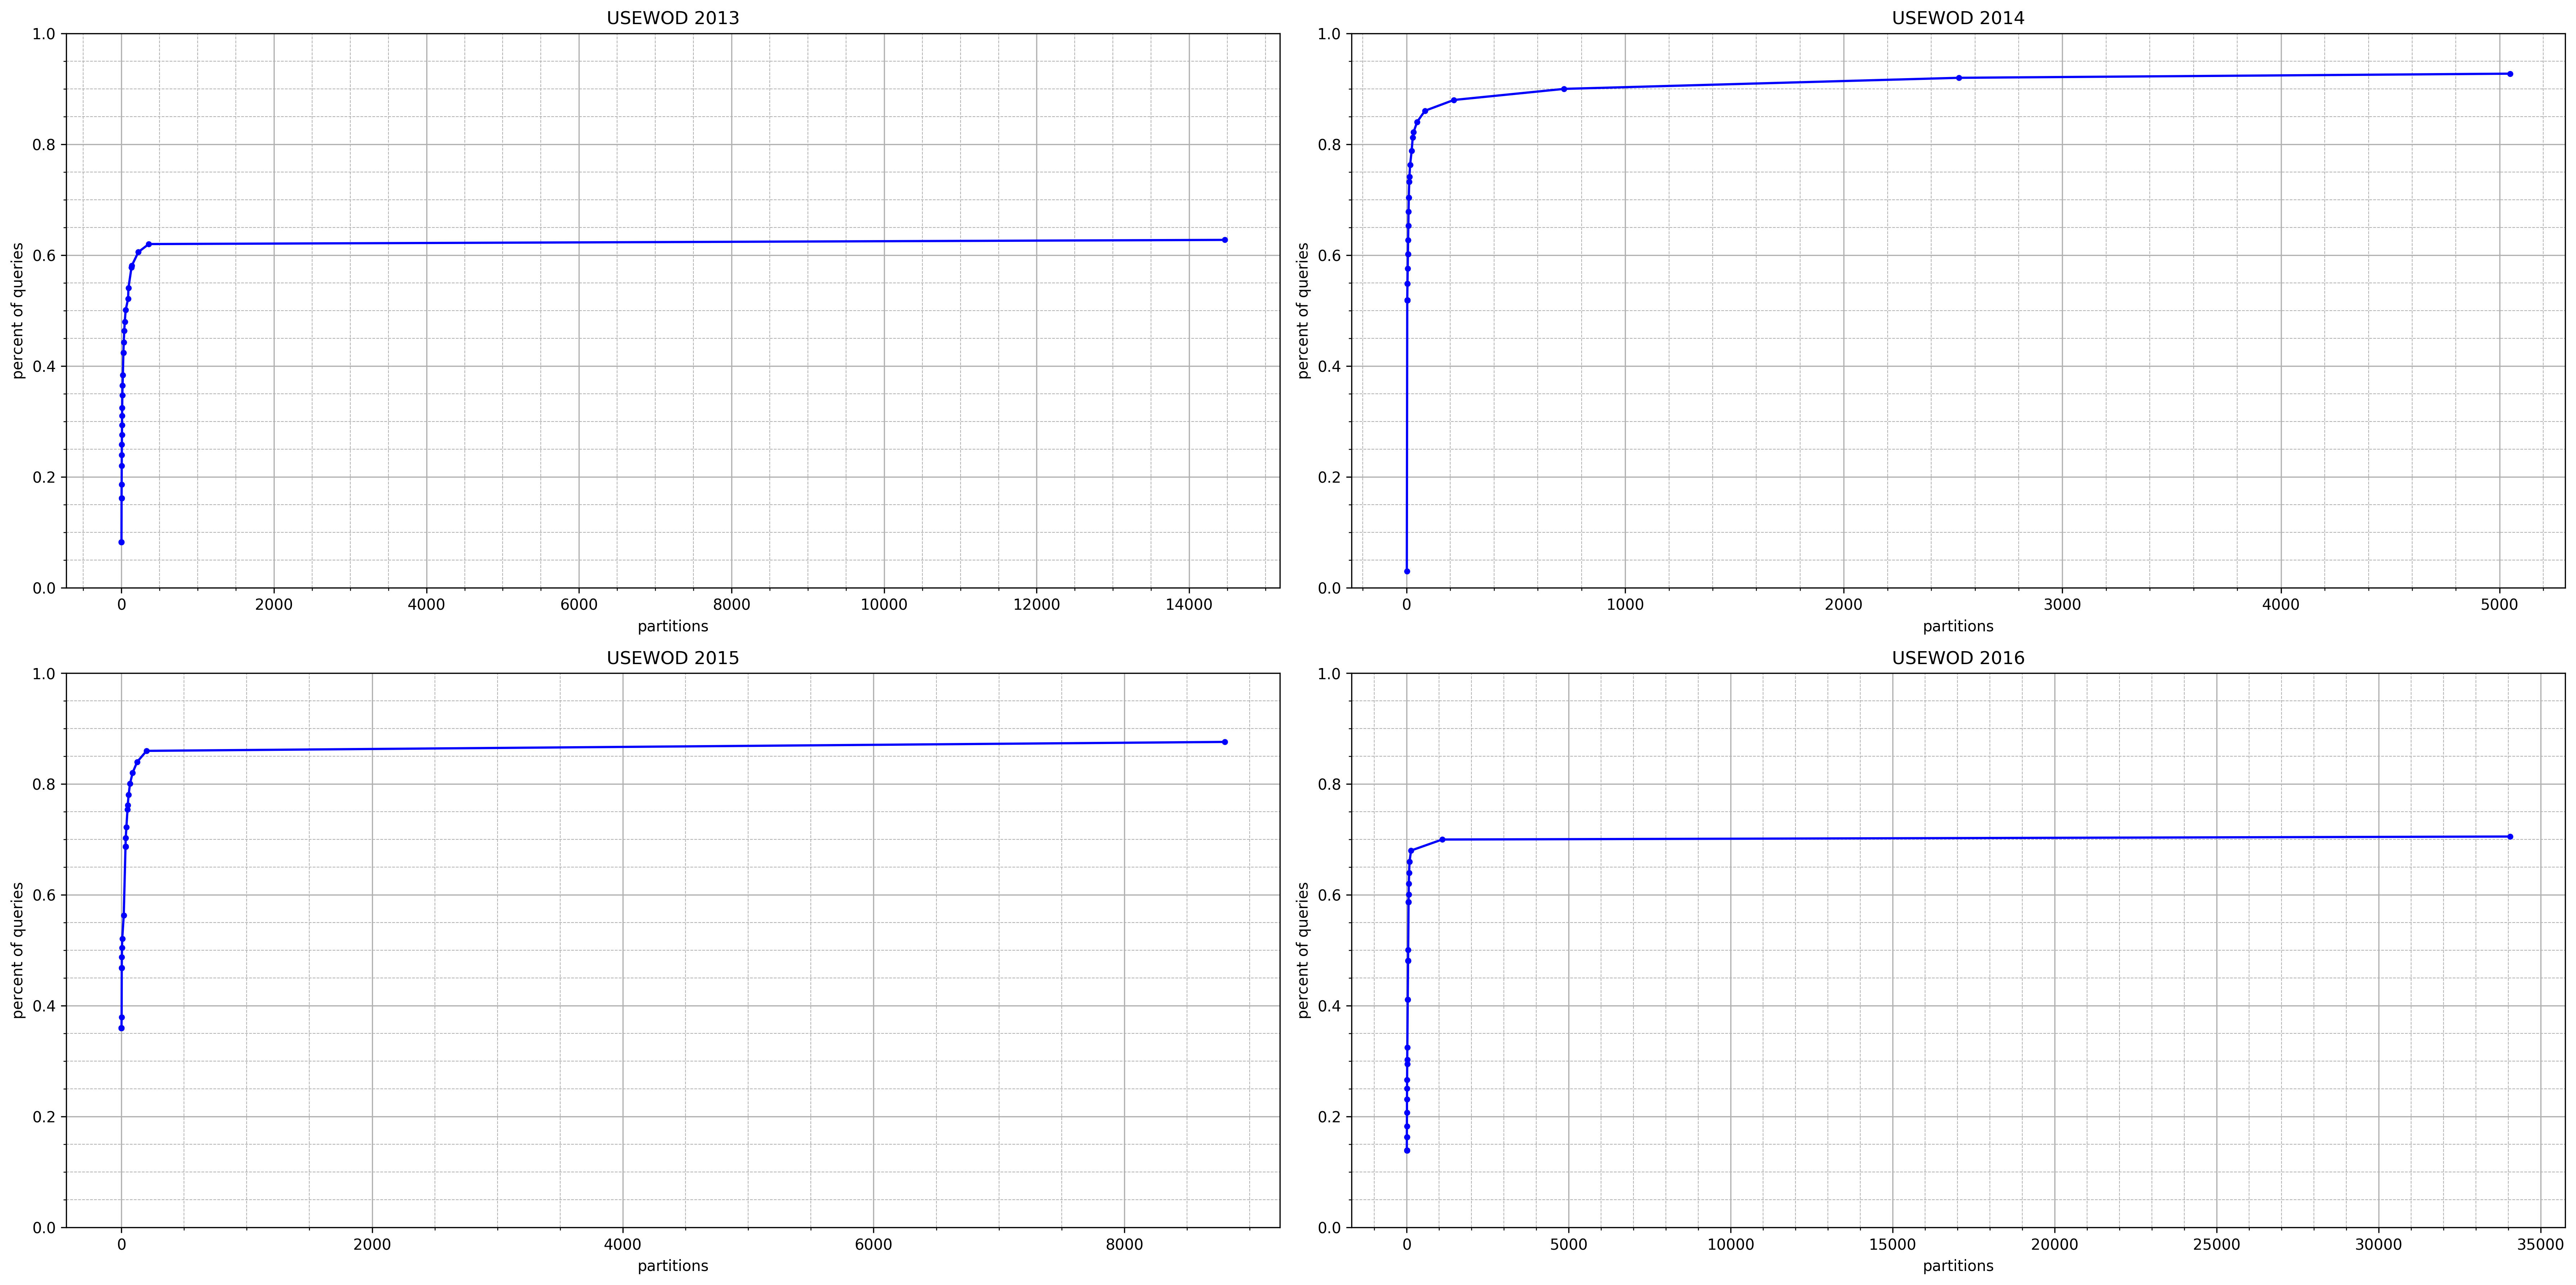

In [158]:
fig, axes = plt.subplots(2,2,figsize=(24,12),dpi=300)
axli = axes.flatten()

for (year, min_unions, axes) in zip(parts, usewod_dfs_minimum_unions, axli):
    mu.plot_minimum_unions(min_unions, axes, f"USEWOD {year}")
    
fig.tight_layout()

In [163]:
parts = [2013, 2014, 2015, 2016]
usewod_df, usewod_meta = mu.import_combined([f"../../new-queryshapes-results/usewod_{part}" for part in parts])
usewod_alt_df = usewod_df[usewod_df["weight"] >= 10]

max_cov = usewod_df["weight"].sum() / usewod_meta["VALID_QUERIES"]
usewod_alt_error = usewod_df[usewod_df["weight"] < 10]["weight"].sum() / usewod_meta["VALID_QUERIES"]

print(max_cov)
print(usewod_alt_error)

0.7276752840705705
0.002458679261696113


In [165]:
usewod_minimum_unions = mu.calc_minimum_unions(usewod_alt_df, usewod_meta["VALID_QUERIES"])

72.52166048088743
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74]


In [167]:
import pickle
with open("../../usewod_minimum_unions_new.pickle", "wb") as file:
    pickle.dump(usewod_minimum_unions, file)

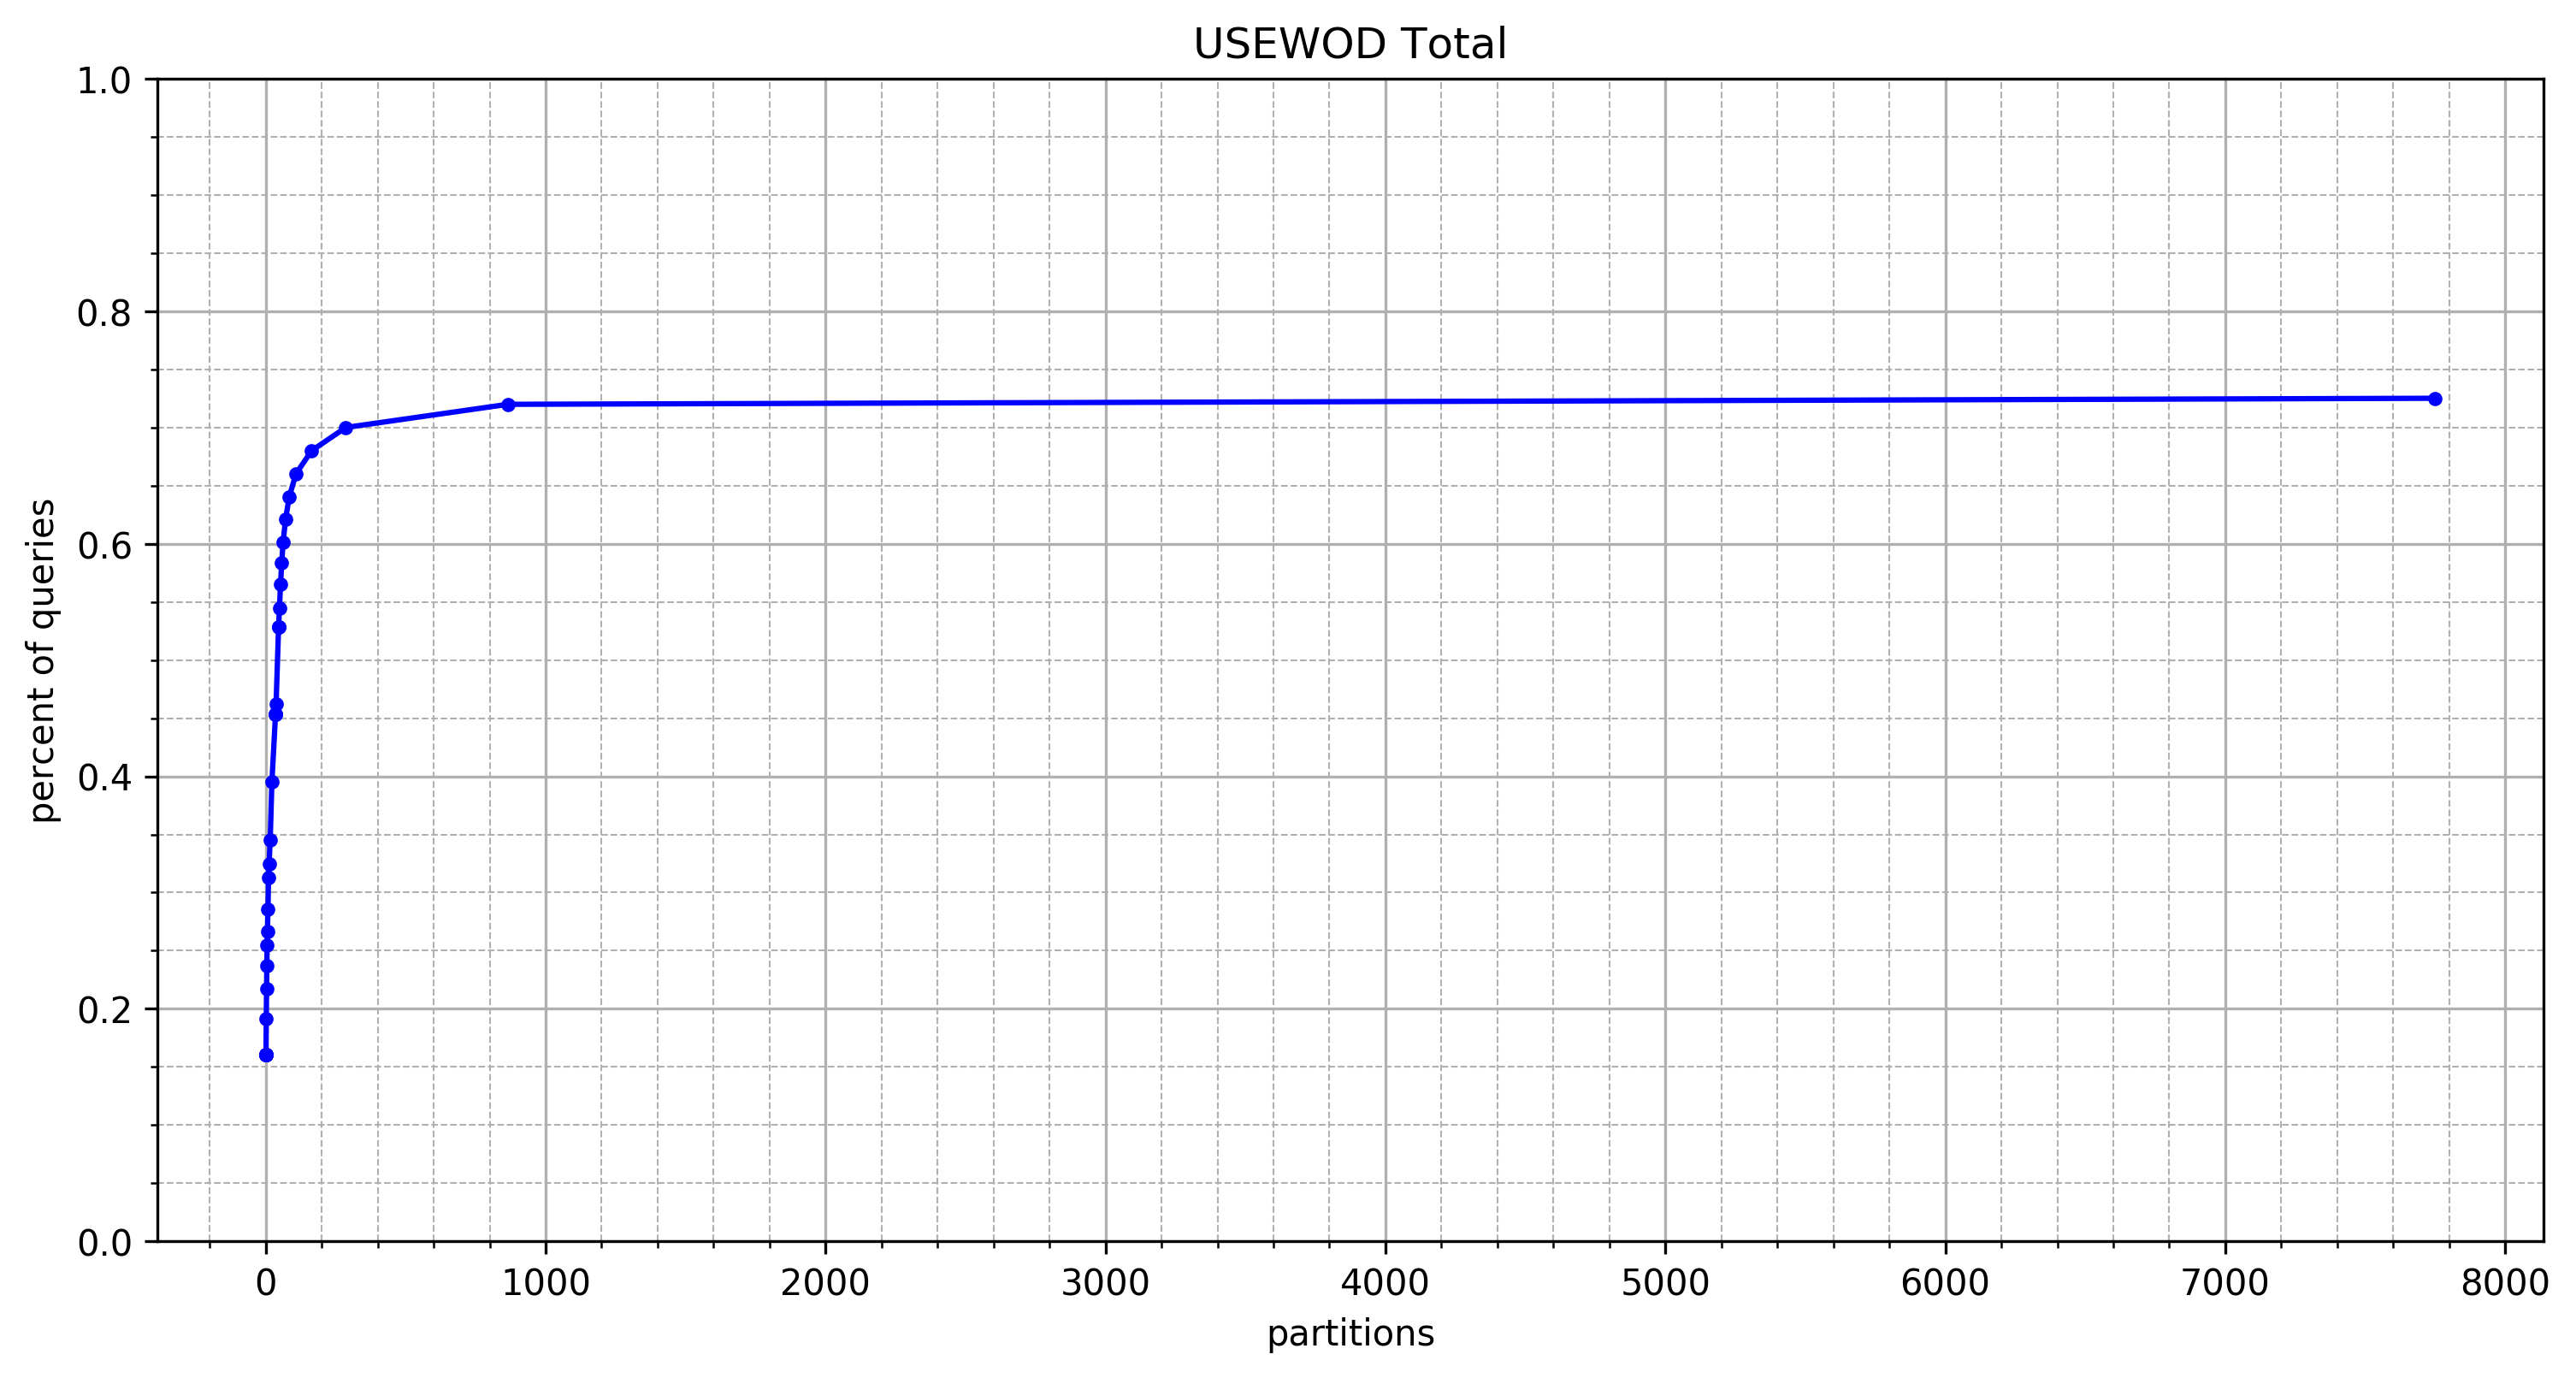

In [168]:
fig, axes = plt.subplots(1, 1, figsize=(12,6), dpi=300)
mu.plot_minimum_unions(usewod_minimum_unions, axes, f"USEWOD Total")

In [107]:
resolved_partitions = []
predicate_map = { int(index): predicate for predicate, index in (line.split("\t") for line in open(f"../predicate-map.txt").readlines())}
for partition in minimum_unions_70[0]:
    indices = partition.split(',')
    predicates = ",".join([predicate_map[int(index)] for index in indices])
    resolved_partitions.append(predicates)

In [110]:
file = open("../partitions.txt", "w")
file.write("Total coverage: " + str(minimum_unions_70[1]) + "\n")
for part in resolved_partitions:
    file.write(part + "\n")

# Wikidata

## All

In [47]:
import pandas as pd
import json

parts = [1,2,3,4,5,6,7]

all_df, all_meta = mu.import_combined([f"../../new-queryshapes-results/wikidata_all_{part}" for part in parts])
alt_df = all_df[all_df["weight"] >= 50]

max_cov = all_df["weight"].sum() / all_meta["VALID_QUERIES"]
alt_error = all_df[all_df["weight"] < 50]["weight"].sum() / all_meta["VALID_QUERIES"]

print(max_cov)
print(alt_error)

0.7287950354307022
0.0016858822256021215


In [6]:
all_minimum_unions = mu.calc_minimum_unions(alt_df, all_meta["VALID_QUERIES"])

72.71091532051001
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74]


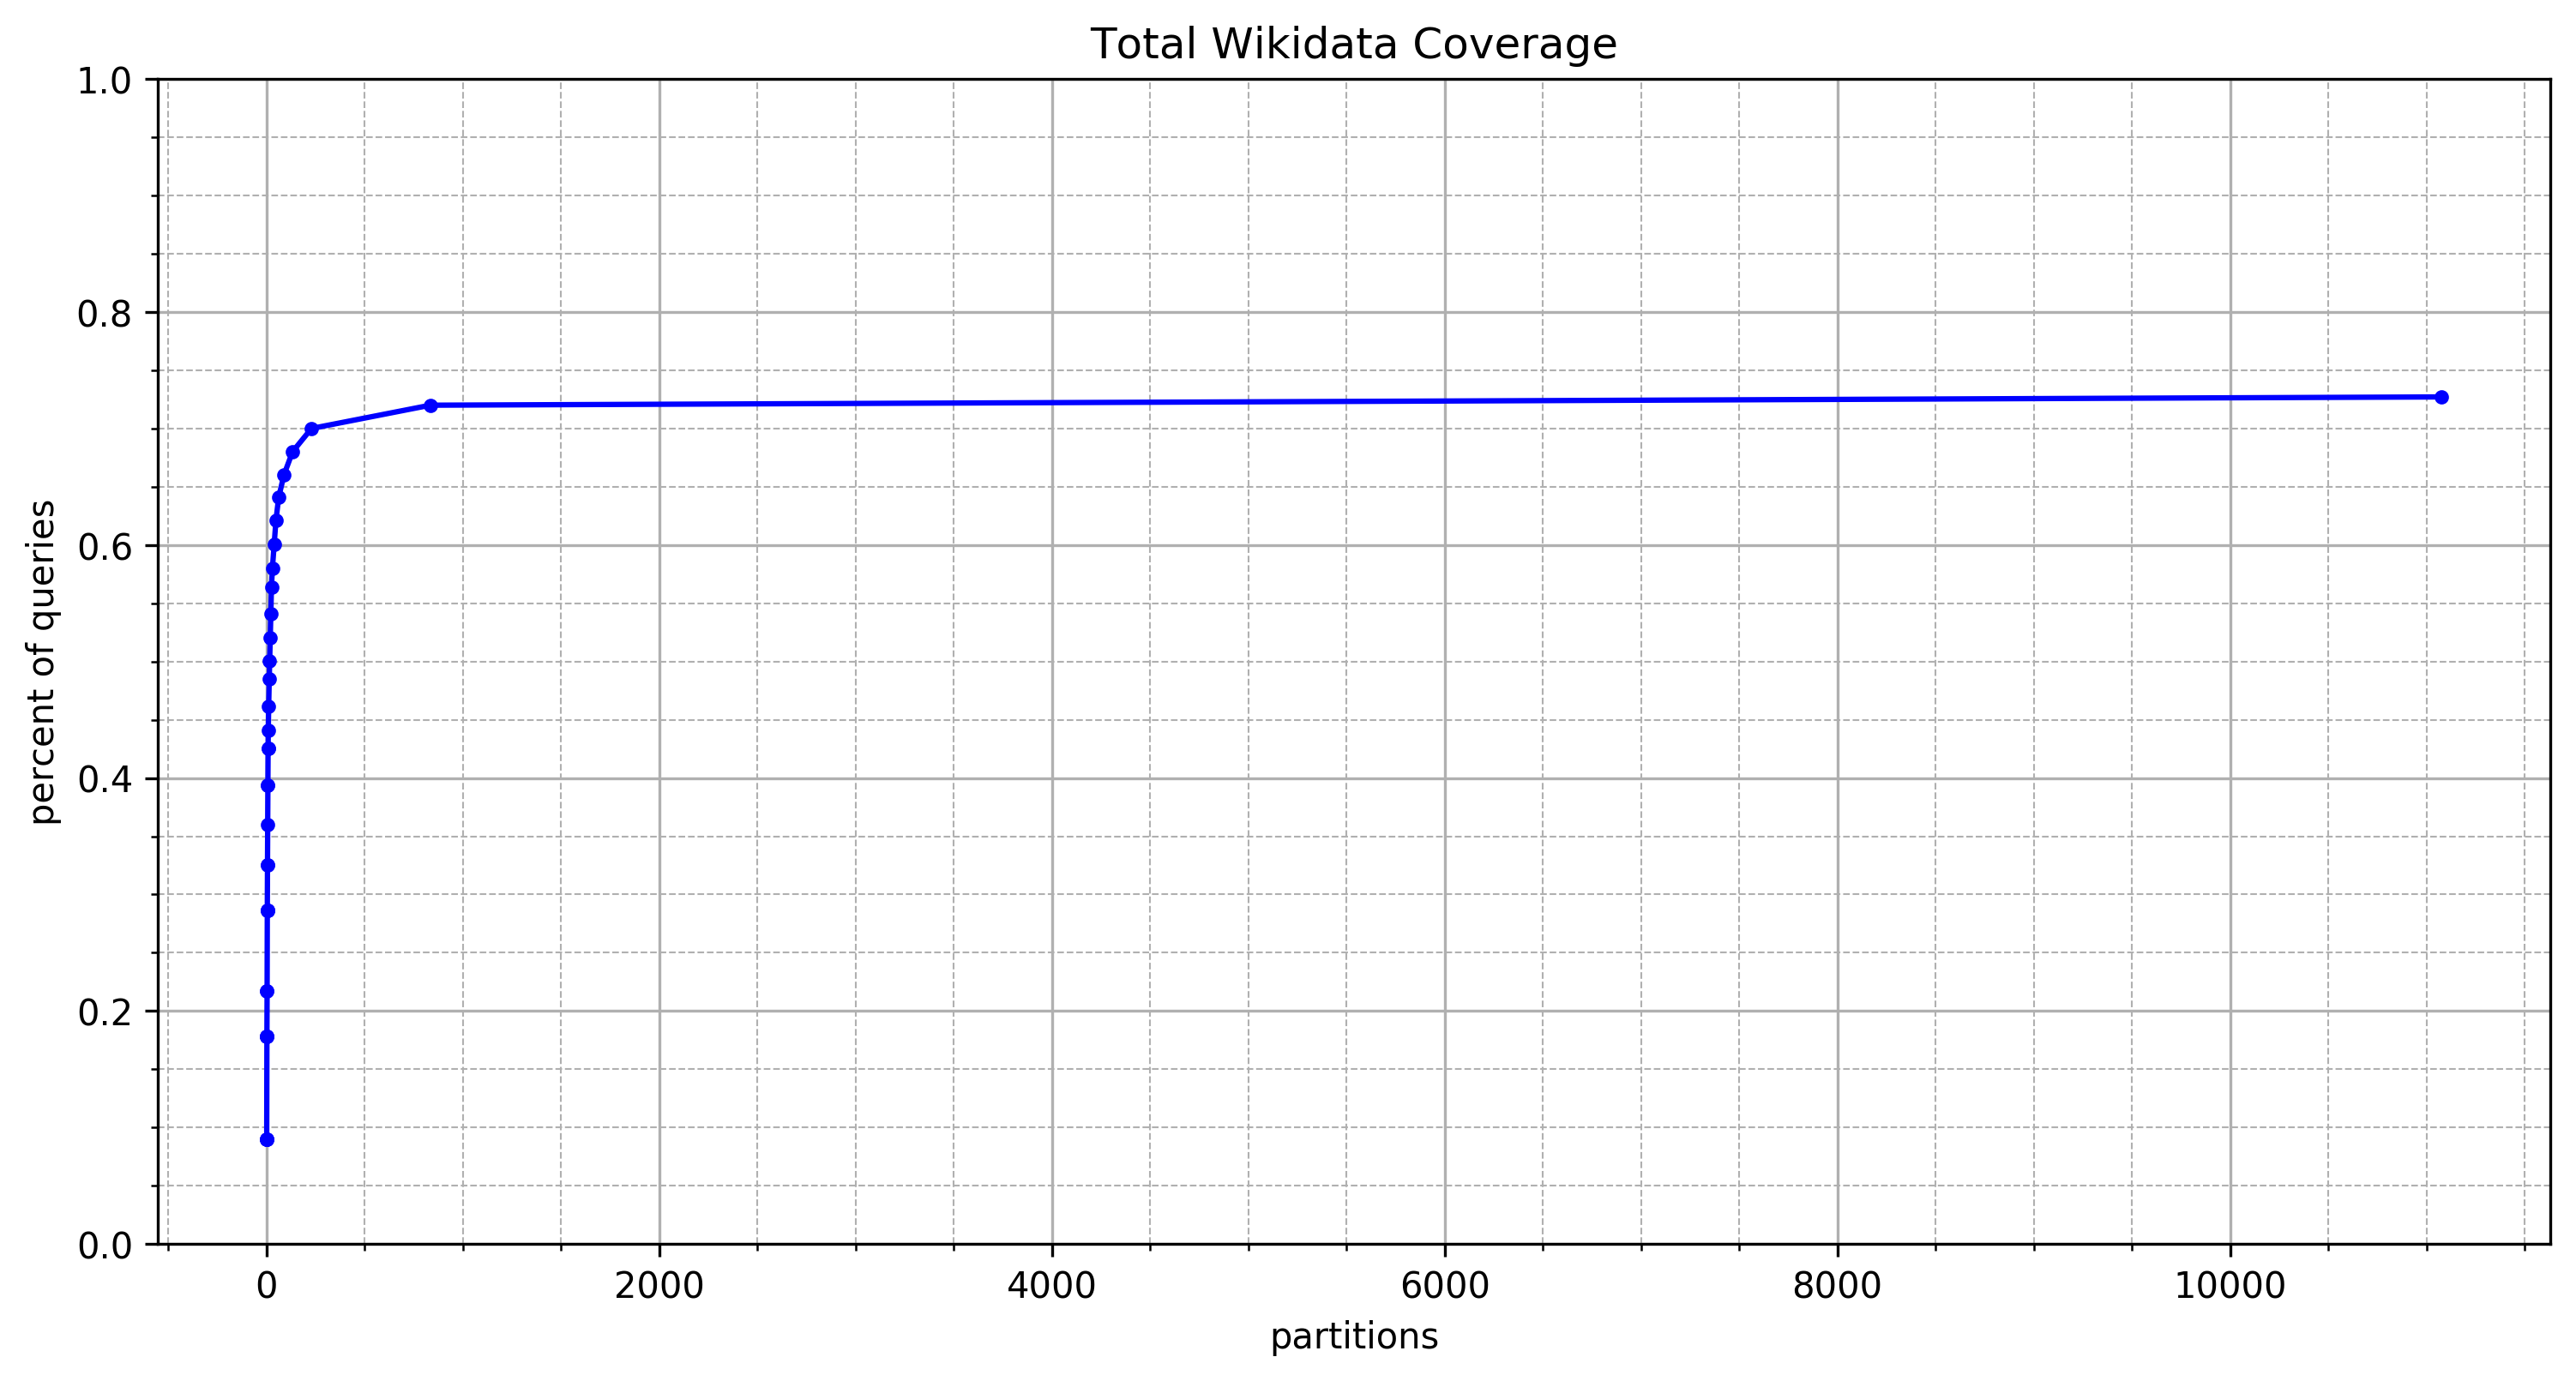

In [166]:
fig, axes = plt.subplots(figsize=(12,6),dpi=300)
mu.plot_minimum_unions(all_minimum_unions, axes, 'Total Wikidata Coverage')

In [33]:
import pickle
with open("../../all_minimum_unions_new.pickle", "wb") as file:
    pickle.dump(all_minimum_unions, file)

## Organic Queries

In [45]:
parts = [1,2,3,4,5,6,7]
organic_df, organic_meta = mu.import_combined([f"../../new-queryshapes-results/wikidata_organic_{part}" for part in parts])
organic_alt_df = organic_df[organic_df["weight"] >= 2]
max_cov = organic_df["weight"].sum() / organic_meta["VALID_QUERIES"]
alt_error = organic_df[organic_df["weight"] < 2]["weight"].sum() / organic_meta["VALID_QUERIES"]

print(max_cov)
print(alt_error)

0.6651256827578499
0.011236047960771914


In [30]:
organic_minimum_unions = mu.calc_minimum_unions(organic_alt_df, organic_meta["VALID_QUERIES"])

65.3889634797078
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66]


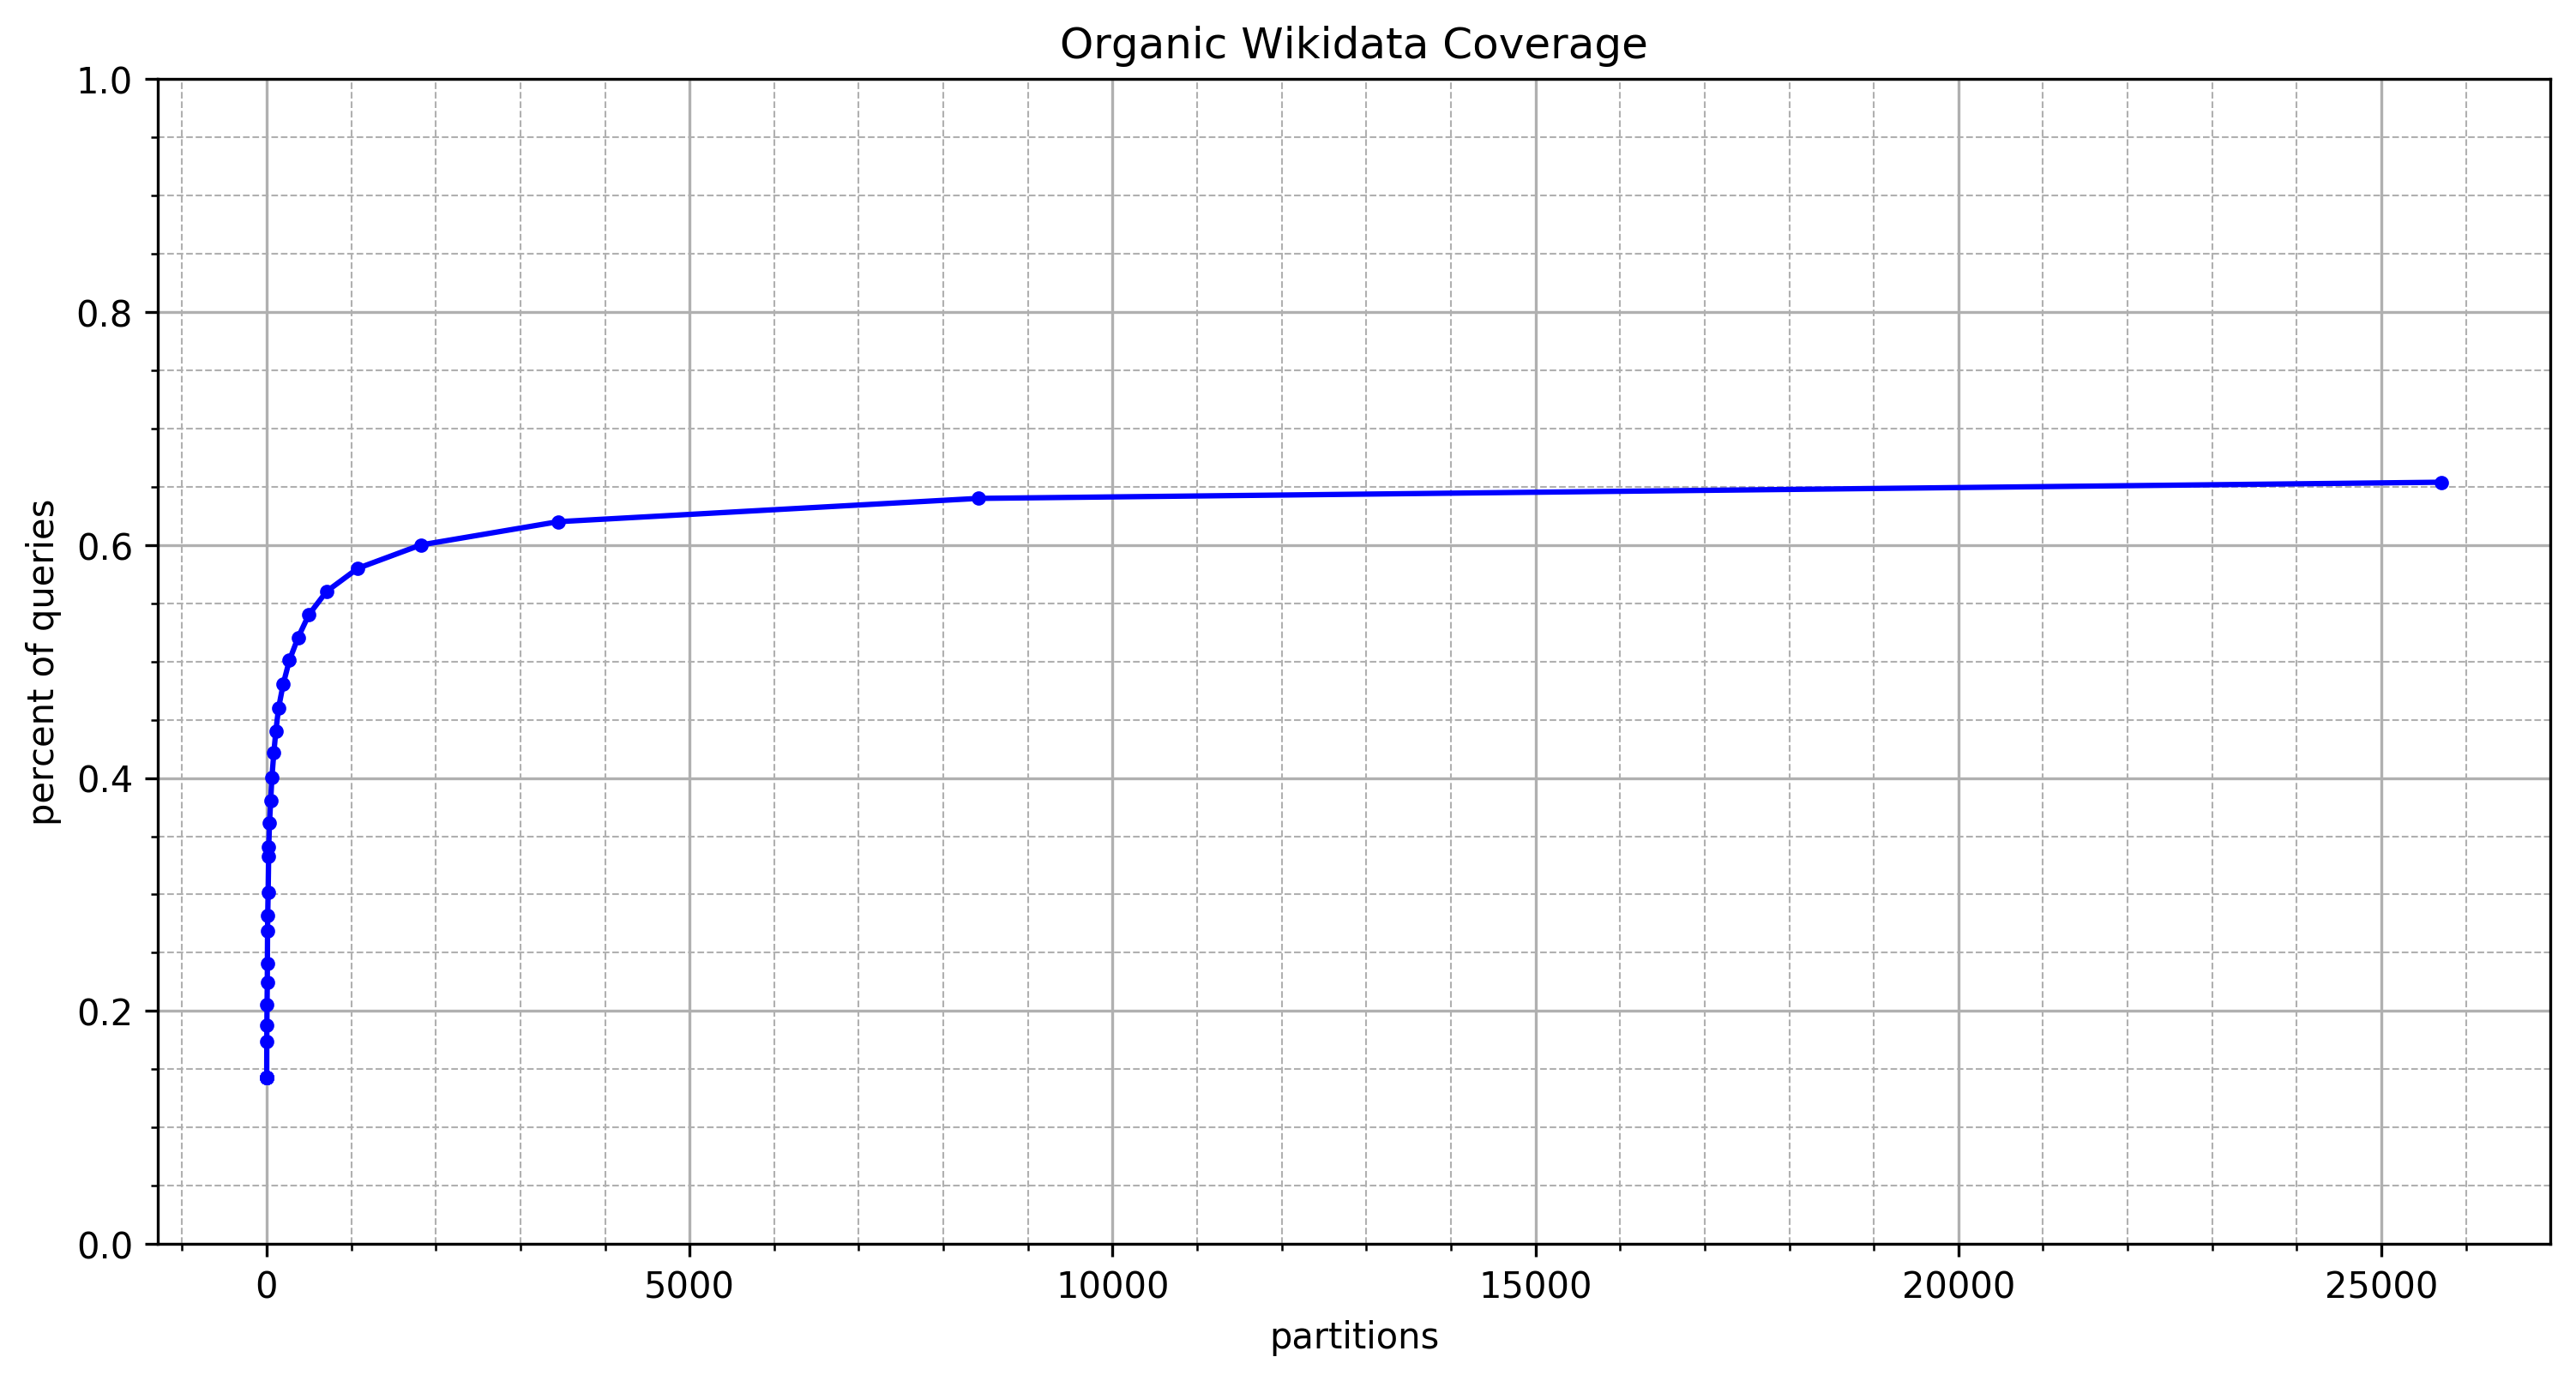

In [169]:
fig, axes = plt.subplots(figsize=(12,6),dpi=300)
mu.plot_minimum_unions(organic_minimum_unions, axes, 'Organic Wikidata Coverage')

In [32]:
import pickle
with open("../../organic_minimum_unions_new.pickle", "wb") as file:
    pickle.dump(organic_minimum_unions, file)   

## Development over time - All

In [48]:
parts = [1,2,3,4,5,6,7]
all_dfs = [mu.import_statistics(f"../../new-queryshapes-results/wikidata_all_{part}", to_set=True) for part in parts]
all_alt_dfs = [(df[df["weight"] >= 50], meta) for df, meta in all_dfs]
max_cov = [df["weight"].sum() / meta["VALID_QUERIES"] for df, meta in all_dfs]
alt_error = [df[df["weight"] < 50]["weight"].sum() / meta["VALID_QUERIES"] for df, meta in all_dfs]
print(max_cov)
print(alt_error)

[0.8318499515079743, 0.8867341725988775, 0.862508527234499, 0.67297751951376, 0.6373632802726334, 0.7005387666505976, 0.6037357079555528]
[0.005799172955698019, 0.0022553297491744993, 0.0017659212844479723, 0.0021058263438170307, 0.002777110356497222, 0.002531698357441069, 0.0032659604536253825]


In [49]:
all_dfs_minimum_unions = [mu.calc_minimum_unions(df, meta["VALID_QUERIES"]) for df, meta in all_alt_dfs]

82.60507785522762
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84]
88.4478842849703
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90]
86.0742605950051
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88]
67.08716931699429
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68]
63.458616991613624
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64]
69.80070682931566
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62,

In [50]:
import pickle
with open("../../all_dfs_minimum_unions_new.pickle", "wb") as file:
    pickle.dump(all_dfs_minimum_unions, file) 

In [52]:
import pickle
import itertools
all_dfs_minimum_unions = pickle.load(open("../../all_dfs_minimum_unions.pickle", "rb"))
all_dfs_dedup = [list(k for k,_ in itertools.groupby(k)) for k in all_dfs_minimum_unions]


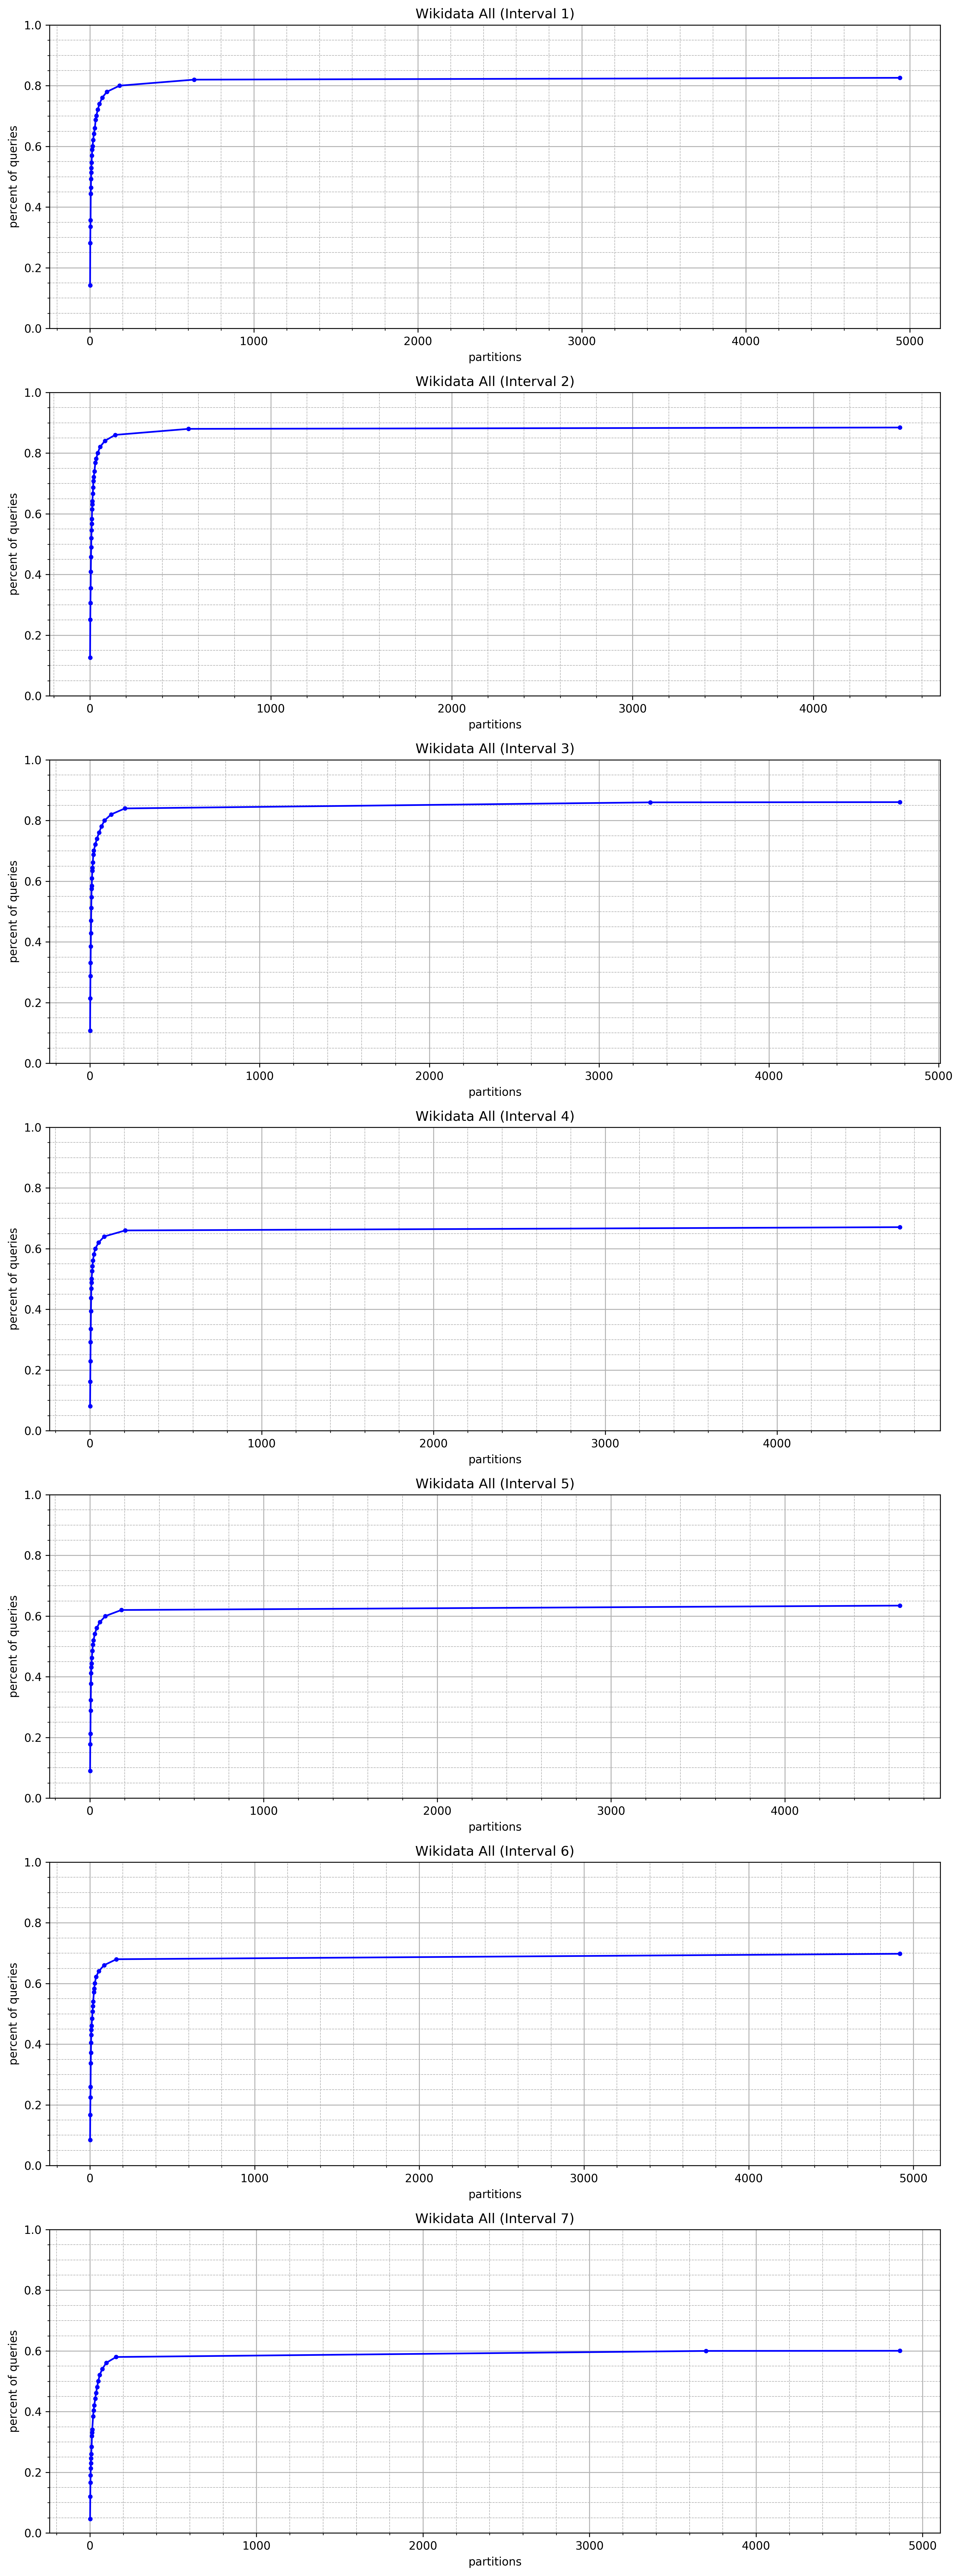

In [171]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(7,1, figsize=(12,32),dpi=300)

for i, min_unions in enumerate(all_dfs_dedup):
    mu.plot_minimum_unions(min_unions, axes[i], f"Wikidata All (Interval {i+1})")
    
fig.tight_layout()

[0.800207831845534, 0.8601626627065017, 0.8400138131163637, 0.6600798847926538, 0.6200500067436842, 0.6800645627695413, 0.5800339585038651]
[None, 0.7974021530598, 0.769832478580391, 0.6420816083952036, 0.6132163051237904, 0.6486777408147262, 0.558207120837191]


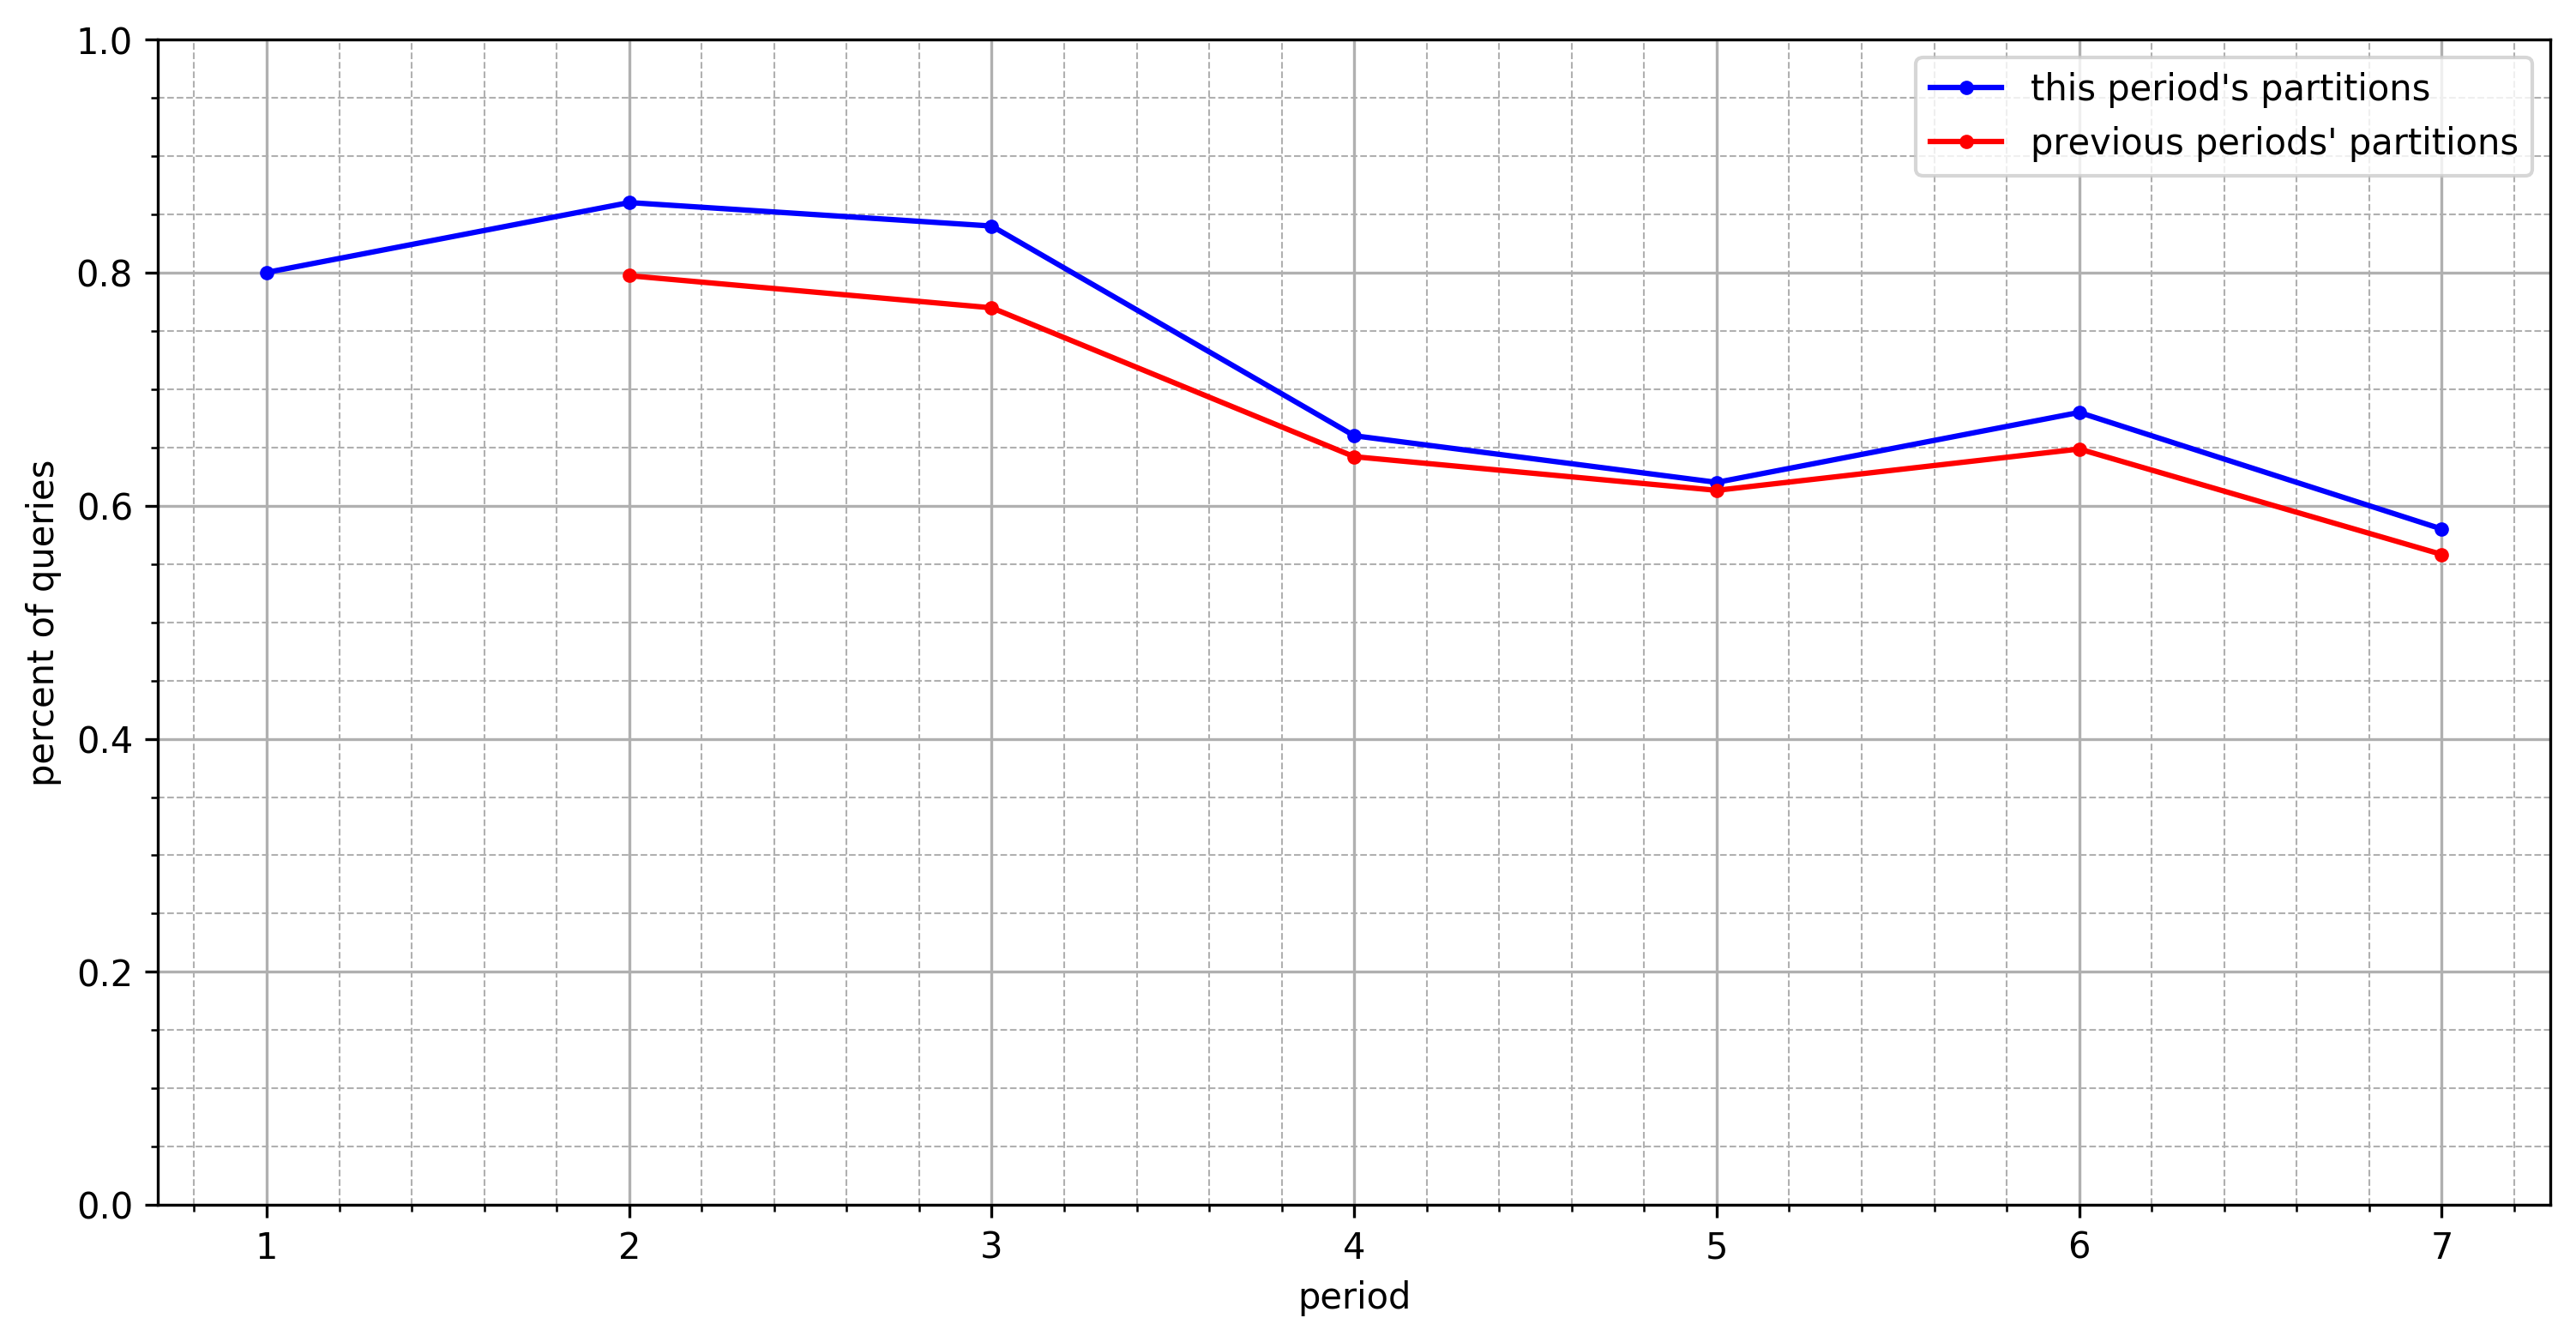

In [136]:
subset = [-2, -2, -2, -1, -1, -1, -2]

all_optimal_partitions = [min_unions[subset[i] -1] for i, min_unions in enumerate(all_dfs_dedup)]
all_cov_now, all_cov_prev = mu.calc_coverage_progression(all_dfs, all_optimal_partitions)
print(all_cov_now)
print(all_cov_prev)

fig, axes = plt.subplots(figsize=(12,6), dpi=300)
mu.plot_coverage_progression(all_cov_now, all_cov_prev, axes)

## Development over time - Organic

In [63]:
parts = [1,2,3,4,5,6,7]
organic_dfs = [mu.import_statistics(f"../../queryshapes_wikidata_organic_{part}", to_set=True) for part in parts]

max_cov = [df["weight"].sum() / meta["VALID_QUERIES"] for df, meta in organic_dfs]
alt_error = [df[df["weight"] < 2]["weight"].sum() / meta["VALID_QUERIES"] for df, meta in organic_dfs]
print(max_cov)
print(alt_error)

[0.8614116298081517, 0.8410322502080331, 0.8201103608181456, 0.47023425098233307, 0.5974780888893351, 0.6783963546174995, 0.6796618238604609]
[0.03600738939791271, 0.036999452010310324, 0.022674405474378375, 0.015286772857226209, 0.01255099206548402, 0.009471132499428166, 0.009565251389709822]


In [64]:
organic_dfs_minimum_unions = [mu.calc_minimum_unions(df, meta["VALID_QUERIES"]) for df, meta in organic_dfs]

86.14116298081517
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88]
84.10322502080331
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86]
82.01103608181455
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84]
47.023425098233304
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48]
59.747808888933506
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60]
67.83963546174995
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68]
67.96618238604609
[2, 4, 6, 8, 10, 12, 1

In [65]:
import pickle
with open("../../organic_dfs_minimum_unions.pickle", "wb") as file:
    pickle.dump(organic_dfs_minimum_unions, file)

In [66]:
import pickle
import itertools
organic_dfs_minimum_unions = pickle.load(open("../../organic_dfs_minimum_unions.pickle", "rb"))
organic_dfs_dedup = [list(k for k,_ in itertools.groupby(k)) for k in organic_dfs_minimum_unions]

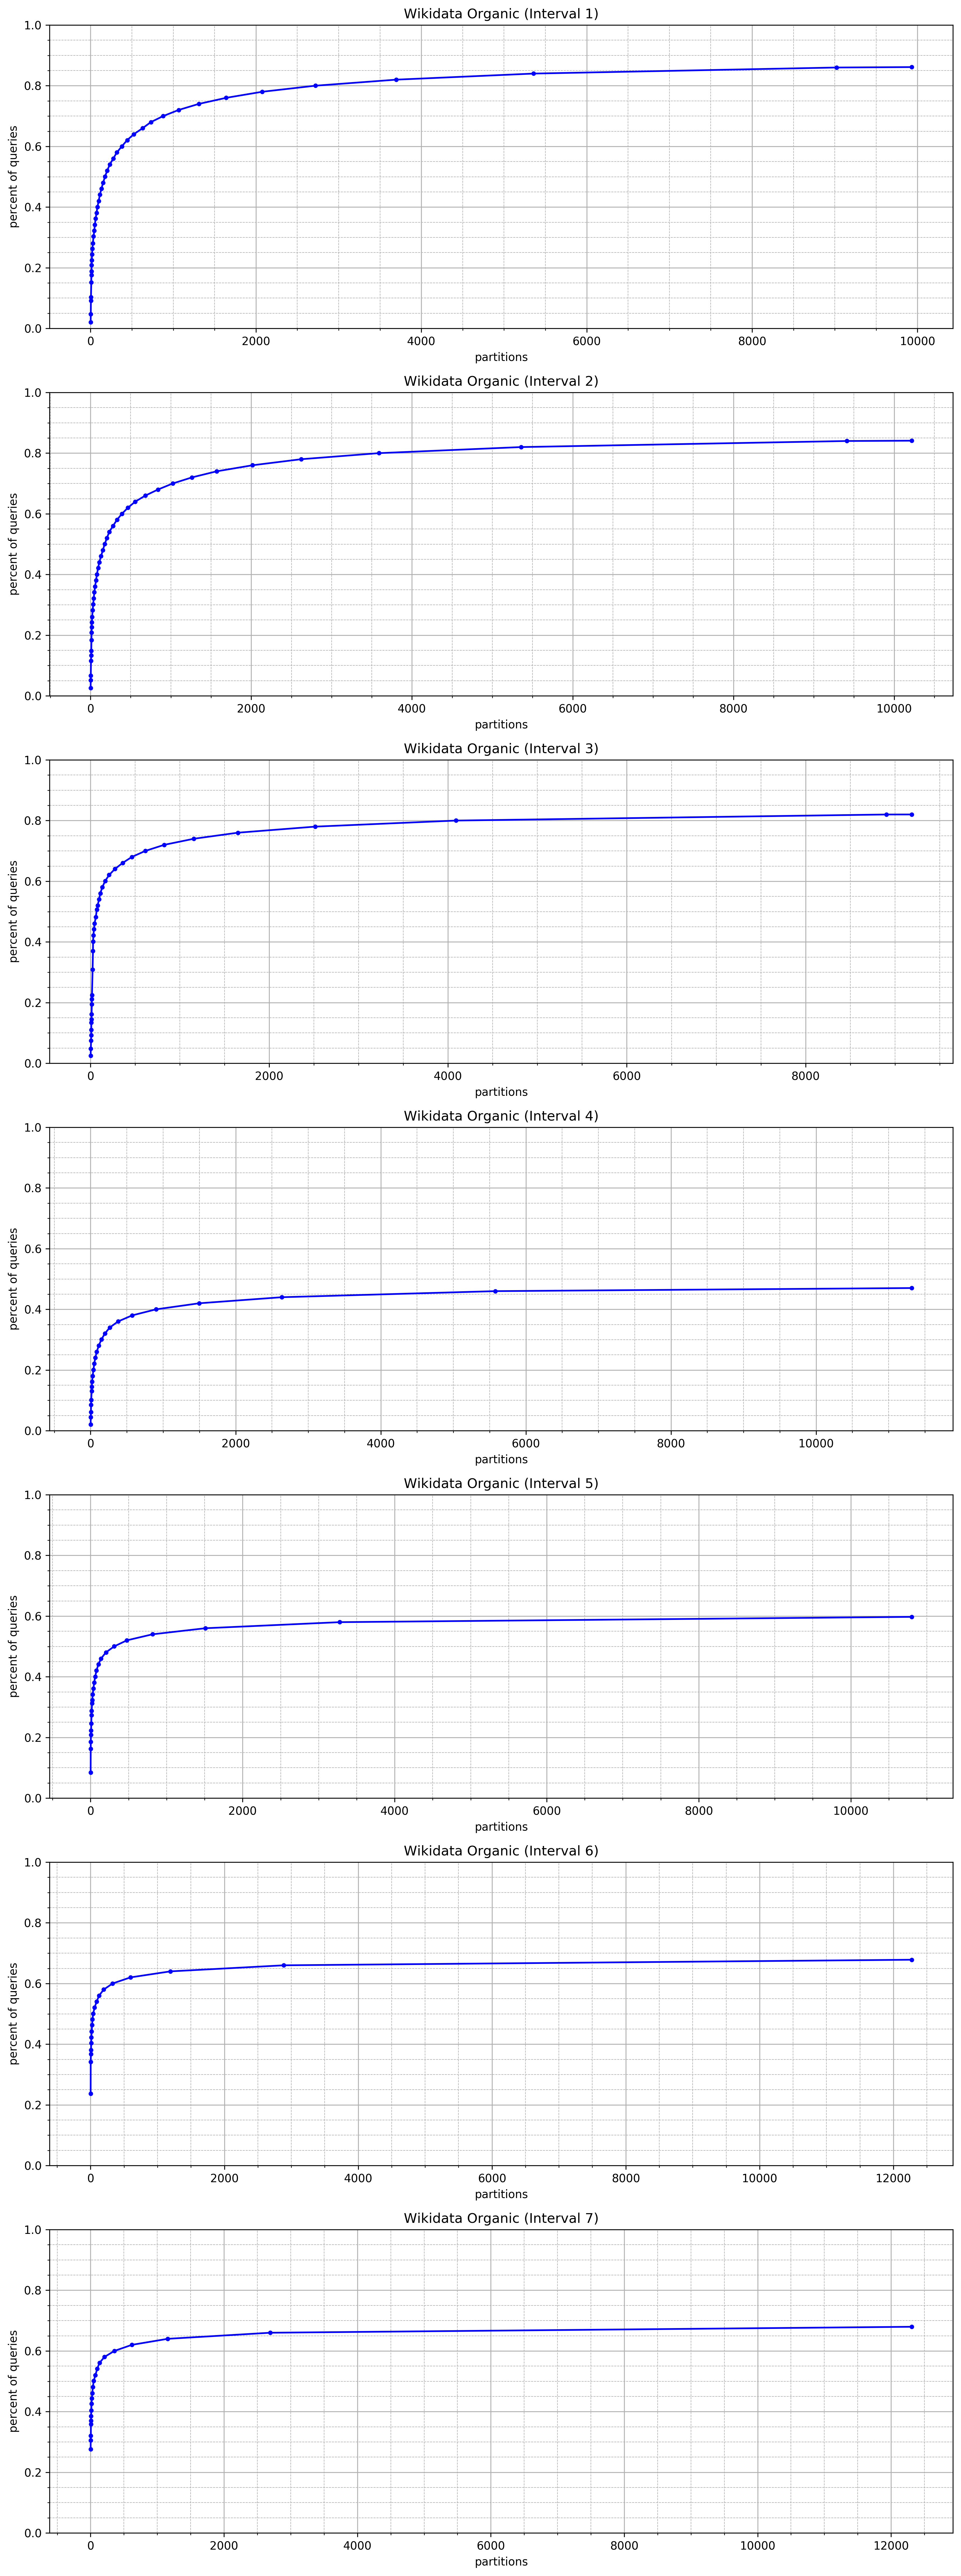

In [172]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(7,1, figsize=(12,32),dpi=300)

for i, min_unions in enumerate(organic_dfs_dedup):
    mu.plot_minimum_unions(min_unions, axes[i], f"Wikidata Organic (Interval {i+1})")
    
fig.tight_layout()

[0.8200002123390204, 0.8000040591828865, 0.780012345957828, 0.44000072430089876, 0.5800044173602257, 0.6600034982755295, 0.6600034958360453]
[None, 0.6451665279779181, 0.6287630705300481, 0.36693485919389335, 0.5220349306106331, 0.6289495754977193, 0.6245920566325439]


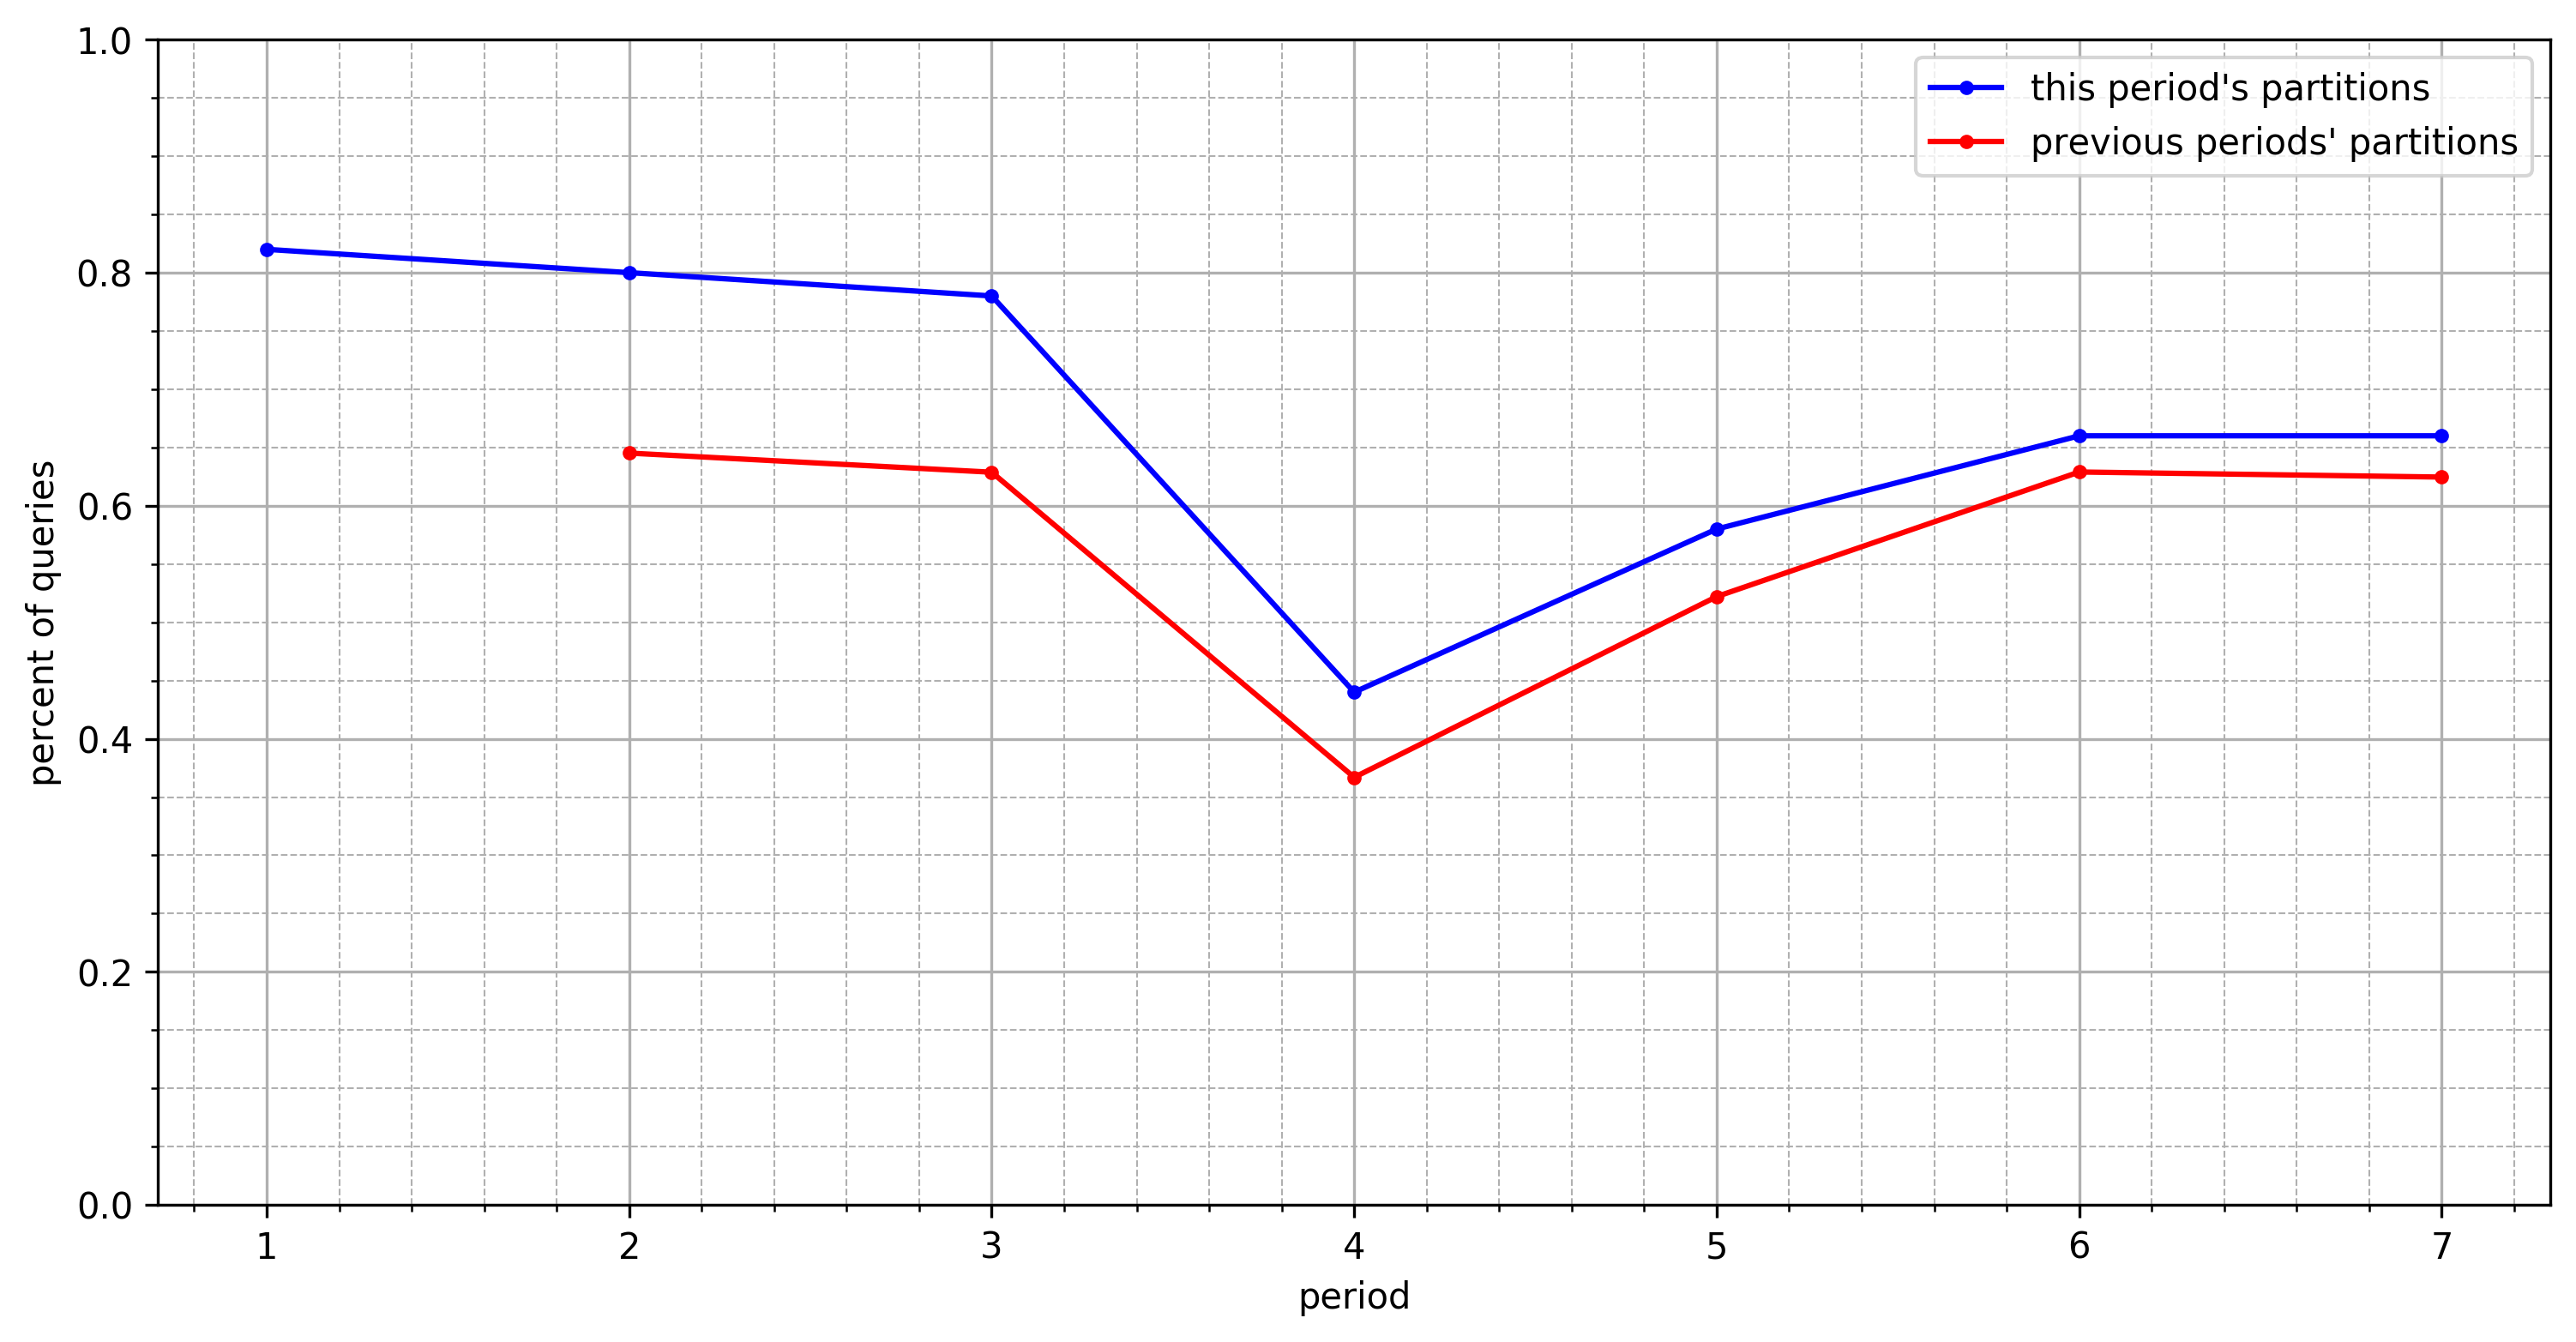

In [135]:
subset = [-3, -3, -3, -2, -1, -1, -1]

organic_optimal_partitions = [min_unions[subset[i] -1] for i, min_unions in enumerate(organic_dfs_dedup)]
organic_cov_now, organic_cov_prev = mu.calc_coverage_progression(organic_dfs, organic_optimal_partitions)
print(organic_cov_now)
print(organic_cov_prev)

fig, axes = plt.subplots(figsize=(12,6), dpi=300)
mu.plot_coverage_progression(organic_cov_now, organic_cov_prev, axes)  